# Part II - Ford GoBike Data Exploration

## by Kristina Klimenchuk


## Investigation Overview

The main goal is to find demographic values of the data set and investigate how users use the service.



## Dataset Overview

Data has 183412 rows and 16 columns. Data includes information about users, bike stations, duration of the rides. Information about users contains: `user type (customer or subscriber)`, `birth year`, and `gender`.
The main focus on user-related features: `user_type`, `member_birth_year`(age), and `member_gender`. Features `duration_sec` will help investigate users' behavior.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Setting the size of all plots
plt.rcParams['figure.figsize'] = 12, 5

# and setting the colors
color = ["#1A374D","#4b85a8", "#406882","#7C99AC","#d98100"]

sb.set()
sb.set_style("whitegrid", {"grid.color": ".1", "grid.linestyle": ""})
sb.despine();

<Figure size 864x360 with 0 Axes>

In [3]:
def title_labels(title,xlabel,ylabel): 
    """Get the data and add labels and title to the plot.

    Args:
      labels (str): A sequence of strings providing the labels for each wedge
      title(str): The title for the plot. """
    
    # Set axis labels
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_title(title, fontsize=15);
    

In [4]:
def stacked_bars_h (data, title, xlabel, ylabel):
    """Get the data and plot horizontal stacked bars with title and labels

    Args:
      data (pandas DataFrame): The DataFrame with specific columns to plot.
      xlabel (str): The label for x axis.
      ylabel (str): The label for y axis.
      title (str): The title for the plot.

    Returns:
      plot horizontal stacked bars
    """
    ax = data.plot.barh(stacked=True, color=color[1:3])


    # Set labels and legend
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_title(title, fontsize=15)

    ax.legend(loc='lower right')
    plt.rc('legend', fontsize=13)

    # Patches is everything inside of the chart
    for rect in ax.patches:
    # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

    # The height of the bar is the data value and can be used as the label
        label_text = f'{width:.0f}'

    # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2

    # plot only when height is greater than specified value
        if height > 0:
            ax.text(label_x, label_y,
            label_text, ha='center',
            va='center', fontsize=13)
            

In [5]:
def hist_scale(data,xlabel, ylabel, title):
    """Get the data and plot a scaled histogram with labels.

    Args:
      data (pandas DataFrame): The DataFrame with a specific column to plot.
      labels (str): A sequence of strings providing the labels for each wedge
      title(str): The title for the plot.


    Returns:
      histogram
    """
    data = df['duration_sec']
    plt.figure(figsize=[12, 5])
    ax = sb.histplot(data, log_scale=True)
    ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(np.geomspace(min(data), max(data),15).round());

    plt.title(title,fontsize=15)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)

    ax.axvline(
              x=data.median(),
              color="#d98100",
              label="Median: " + str(int(data.median())),
              linestyle='--', linewidth=2
              )

    ax.axvline(
              x=data.mean(), color="#d98100",
              label="Mean: " + str(int(data.mean())),
              linestyle='-',
              linewidth=2
              )
    


    ax.legend()

    plt.show()




In [6]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [7]:
# Convert "start_time" and "end_time" to a date-time
df["start_time"] = pd.to_datetime(df["start_time"])

# Extract the weekdays
df['start_weekday'] = df['start_time'].dt.day_name()

In [8]:
df = df.query("member_birth_year > 1945.0")

# Drop missing values
df = df.dropna()

# Initiate "member_age" column 
df["member_age"] = (2019 - df["member_birth_year"]).astype(int)


## Distribution of ride durations
Since the distribution is skewed, I put the x-axis on a log scale to make the histogram more informative. As a result, the median ride is 511 seconds, and the average ride is  704 seconds. Durations of rides take on a vast range of values, from 61 seconds at the lowest to 84548 seconds at the highest.

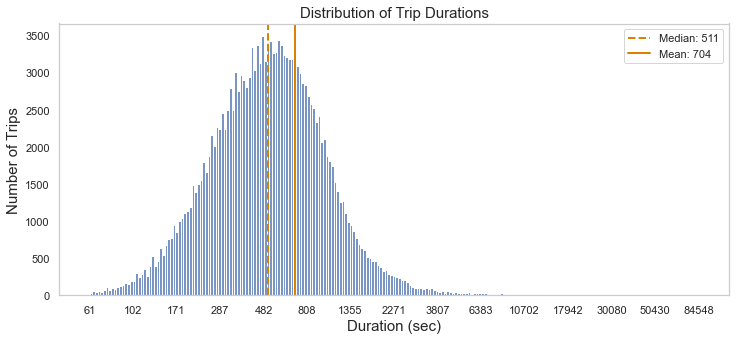

In [9]:
# Use hist_scale function to build duration distribution
hist_scale(df['duration_sec'],
           xlabel = 'Duration (sec)', 
           ylabel = 'Number of Trips', 
           title ='Distribution of Trip Durations')

## The ratio of the users' type by gender
The major part of each gender consists of the "Subscriber" user type. For **male `"Subscriber"` type equals 91%**, for females 89% and other 88%.
Also, the plot shows that males make up most of the dataset, which is __75% of all users.__

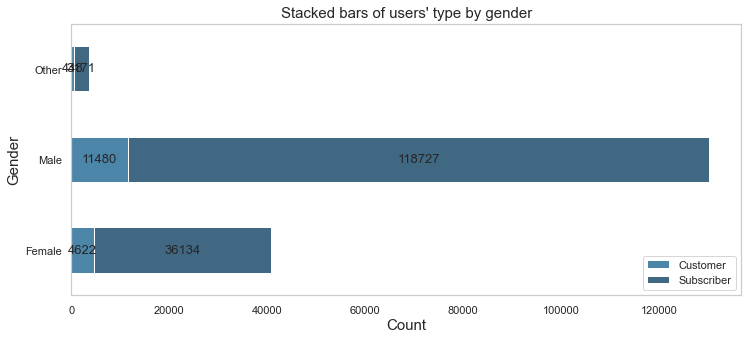

In [10]:
# Use .groupby() and .value_counts() to create a  table
gender_usertype = df.groupby("member_gender")["user_type"].value_counts().unstack()
# Create the stacked bar plot from the gender_usertype
stacked_bars_h (gender_usertype, "Stacked bars of users' type by gender", "Count", "Gender")

## Distribution of average duration rides by users' age
Users in 30 years made the most significant number of long rides.

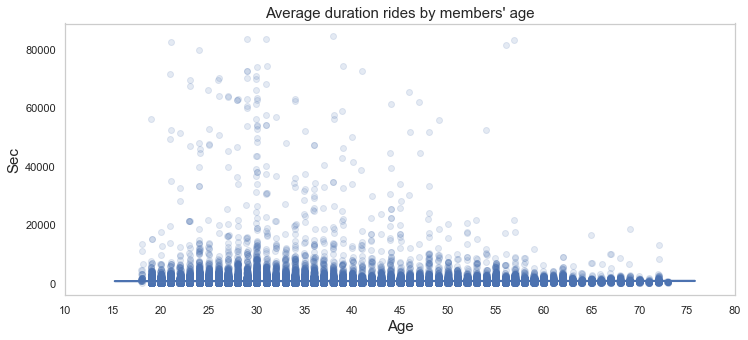

In [11]:
# Group by the "member_age" and "duration_sec" and calculate the mean.
ave_dur_by_age = df.groupby("member_age")["duration_sec"].mean()

ax = sb.regplot(data = df, x = 'member_age', 
                y = 'duration_sec',  ci=65,
                truncate=False,  x_jitter=.07,
                scatter_kws={'alpha':0.15})

# Set axis labels
title_labels("Average duration rides by members' age","Age","Sec")

ax.set_xticks(np.arange(10, 80+5, 5));

## The average duration of ride for each day of week by users' type

The line plot demonstrates that the average ride duration among "Subscribers" does not change much depending on the days of the week. At the same time, the average ride duration among "Customers" rises sharply on weekends.
The  __"Customer"__ average ride duration is  __1310 seconds__, and the average __"Subscriber"__ duration of ride equals  __640 seconds.__

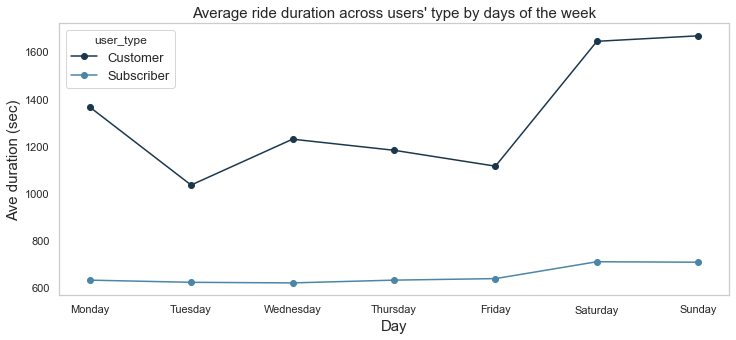

In [12]:
order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
# Group "start_weekday","user_type" by average "duration_sec"
aver_trip_weekdays_types = df.groupby(["start_weekday","user_type"])[["duration_sec"]].mean().reset_index()

aver_trip_weekdays_types = aver_trip_weekdays_types.pivot(index="start_weekday", 
                                                          columns='user_type', 
                                                          values='duration_sec')
# Plot the line graph 
ax = aver_trip_weekdays_types.loc[order].plot.line(color=color,marker='o')

# Set axis labels and title
title_labels("Average ride duration across users' type by days of the week",
             "Day","Ave duration (sec)")

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Ford_GoBike_Data_Exploration.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Ford_GoBike_Data_Exploration.ipynb to slides
[NbConvertApp] Writing 741915 bytes to Part_II_Ford_GoBike_Data_Exploration.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Ford_GoBike_Data_Exploration.slides.html
Use Control-C to stop this server
